In [92]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MLflow Regression Recipe Notebook

This notebook runs the MLflow Regression Recipe on Databricks and inspects its results. For more information about the MLflow Regression Recipe, including usage examples, see the [Regression Recipe overview documentation](https://mlflow.org/docs/latest/recipes.html#regression-recipe) the [Regression Recipe API documentation](https://mlflow.org/docs/latest/python_api/mlflow.recipes.html#module-mlflow.recipes.regression.v1.recipe).

In [93]:
from mlflow.recipes import Recipe

r = Recipe(profile="local")

2022/12/21 16:44:51 INFO mlflow.recipes.recipe: Creating MLflow Recipe 'recipes-refactoring-example' with profile: 'local'


In [94]:
r.inspect()

In [95]:
r.run("ingest")

2022/12/21 16:44:53 INFO mlflow.recipes.step: Running step ingest...
Loading dataset CSV using `pandas.read_csv()` with default arguments and assumed index column 0 which may not produce the desired schema. If the schema is not correct, you can adjust it by modifying the `load_file_as_dataframe()` function in `steps/ingest.py`


In [96]:
r.get_artifact("ingested_data").isna().sum()

YrSold          0
HeatingQC       0
Street          0
YearRemodAdd    0
Heating         0
SalePrice       0
dtype: int64

In [97]:
r.run("split")

2022/12/21 16:44:54 INFO mlflow.recipes.utils.execution: ingest: No changes. Skipping.


2022/12/21 16:44:56 INFO mlflow.recipes.step: Running step split...


In [98]:
training_data = r.get_artifact("training_data")
training_data.head()

,YrSold,HeatingQC,Street,YearRemodAdd,Heating,SalePrice
0,2007.0,TA,Pave,1975.0,GasA,12.209188
1,2006.0,TA,Pave,1950.0,GasA,11.798104
3,2008.0,Ex,Pave,1977.0,GasA,12.165251
4,2010.0,TA,Pave,1971.0,GasA,11.385092
5,2009.0,TA,Pave,2006.0,GasW,11.350407


In [99]:
r.run("transform")

2022/12/21 16:45:01 INFO mlflow.recipes.utils.execution: ingest, split: No changes. Skipping.


2022/12/21 16:45:03 INFO mlflow.recipes.step: Running step transform...


Name,Type
YrSold,float64
HeatingQC,object
Street,object
YearRemodAdd,float64
Heating,object
SalePrice,float64
Name,Type
pipeline__YrSold,float64
pipeline__YearRemodAdd,float64
onehotencoder__HeatingQC_Ex,float64


In [100]:
r.run("train")

2022/12/21 16:45:05 INFO mlflow.recipes.utils.execution: ingest, split, transform: No changes. Skipping.


2022/12/21 16:45:07 INFO mlflow.recipes.step: Running step train...
2022/12/21 16:45:13 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2022/12/21 16:45:23 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2022/12/21 16:45:23 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.


Metric,training,validation
root_mean_squared_error,0.311425,0.322199
example_count,447,85
max_error,1.31542,1.1383
mean_absolute_error,0.236634,0.243268
mean_absolute_percentage_error,0.0196367,0.0201097
mean_on_target,12.0149,12.0601
mean_squared_error,0.0969856,0.103812
r2_score,0.405778,0.253567
score,0.405778,0.253567
sum_on_target,5370.66,1025.11


In [101]:
trained_model = r.get_artifact("model")
print(trained_model)

mlflow.pyfunc.loaded_model:
  artifact_path: train/model
  flavor: mlflow.sklearn
  run_id: 0407b853058446e0ac95cf1a26435b63



In [102]:
r.run("evaluate")

2022/12/21 16:45:24 INFO mlflow.recipes.utils.execution: ingest, split, transform, train: No changes. Skipping.


2022/12/21 16:45:26 INFO mlflow.recipes.step: Running step evaluate...
2022/12/21 16:45:29 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2022/12/21 16:45:31 INFO mlflow.models.evaluation.default_evaluator: Shap explainer _PatchedKernelExplainer is used.

100%|██████████| 10/10 [00:00<00:00, 67.58it/s]
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
2022/12/21 16:45:38 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.


Metric,validation,test
root_mean_squared_error,0.322199,0.313070
example_count,85,68.000000
max_error,1.1383,0.790303
mean_absolute_error,0.243268,0.252113
mean_absolute_percentage_error,0.0201097,0.021121
mean_on_target,12.0601,11.982926
mean_squared_error,0.103812,0.098013
r2_score,0.253567,0.086936
score,0.253567,0.086936
sum_on_target,1025.11,814.838945


In [103]:
r.get_artifact("run")

<Run: data=<RunData: metrics={'test_example_count': 68.0,
 'test_max_error': 0.7903032320137555,
 'test_mean_absolute_error': 0.25211274612496776,
 'test_mean_absolute_percentage_error': 0.021120815746352967,
 'test_mean_on_target': 11.982925655060555,
 'test_mean_squared_error': 0.09801291833397312,
 'test_r2_score': 0.08693593206814965,
 'test_root_mean_squared_error': 0.31307014922214016,
 'test_score': 0.08693593206814965,
 'test_sum_on_target': 814.8389445441178,
 'training_example_count': 447.0,
 'training_mae': 0.23663427803555473,
 'training_max_error': 1.315424272885867,
 'training_mean_absolute_error': 0.23663427803555473,
 'training_mean_absolute_percentage_error': 0.019636730800257653,
 'training_mean_on_target': 12.014895619023449,
 'training_mean_squared_error': 0.0969855931065472,
 'training_mse': 0.0969855931065472,
 'training_r2_score': 0.40577760865284096,
 'training_rmse': 0.3114251003155449,
 'training_root_mean_squared_error': 0.3114251003155449,
 'training_score':

/Users/jeanne.choo/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


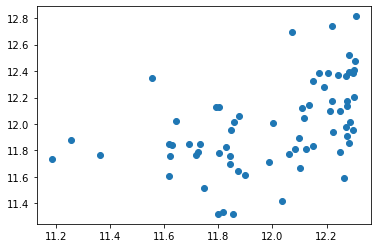

In [104]:

from mlflow.tracking import MlflowClient
client = MlflowClient()
import matplotlib.pyplot as plt
test_y = r.get_artifact("test_data")["SalePrice"]
test_X = r.get_artifact("test_data").drop(["SalePrice"], axis=1)
pred_y = trained_model.predict(test_X)
plt.scatter(pred_y, test_y)
# r2_score(test_y, pred_y)

In [105]:
r.run("register")

2022/12/21 16:45:40 INFO mlflow.recipes.utils.execution: ingest, split, transform, train, evaluate: No changes. Skipping.


2022/12/21 16:45:41 INFO mlflow.recipes.step: Running step register...
Registered model 'ames_pricing' already exists. Creating a new version of this model...
2022/12/21 16:45:42 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: ames_pricing, version 2
Created version '2' of model 'ames_pricing'.
